<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import(
    accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/Nurulfikri/Laptop/SEM 3/Machine Learning/Praktikum ml/Praktikum 4"

In [4]:
df = pd.read_csv(f"{path}/Data/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [5]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


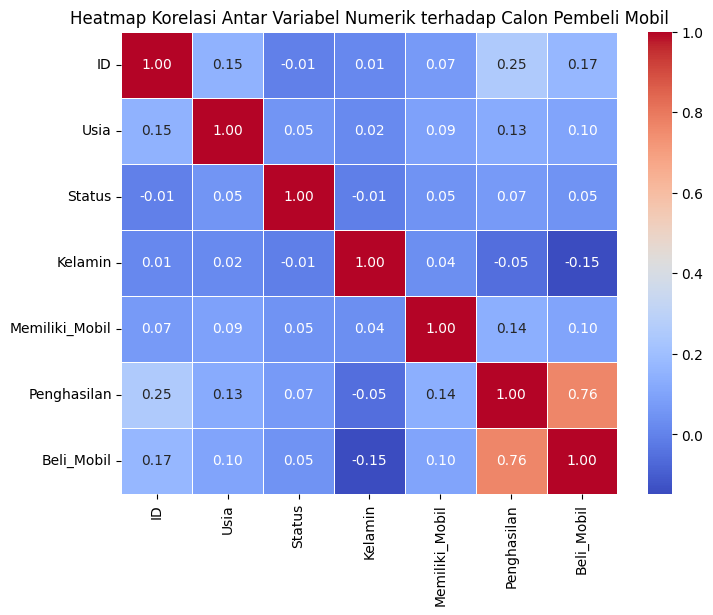

In [6]:
#Visalisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik terhadap Calon Pembeli Mobil", fontsize=12)
plt.show()

In [7]:
# Fitur numerik dan biner

feature_num = ['Usia', 'Penghasilan']
feature_bin = ['Kelamin']
feature_cat = ['Status', 'Memiliki_Mobil']

all_features = feature_num + feature_bin + feature_cat

# Gabungkan & drop missing
use_cols = all_features + ['Beli_Mobil']
df_model = df[use_cols].dropna().copy()

x = df_model[all_features]
y = df_model['Beli_Mobil']

print("X.shape:", x.shape)
print("y.shape:", y.shape)

X.shape: (1000, 5)
y.shape: (1000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, # Use the updated 'x' variable
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (800, 5)
Data uji: (200, 5)


In [9]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin),
        ('cat', OneHotEncoder(handle_unknown='ignore'), feature_cat)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)

])

#Latihan model
clf.fit(X_train, y_train)
print("Model Logistic Regression berhasil di latih")

Model Logistic Regression berhasil di latih


In [10]:
# Prediksi & probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Hitung metrik
print(f'Akurasi      : {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision    : {precision_score(y_test, y_pred, zero_division=0):.4f}')
print(f'Recall       : {recall_score(y_test, y_pred, zero_division=0):.4f}')
print(f'F1-Score     : {f1_score(y_test, y_pred, zero_division=0):.4f}')
print(f'ROC-AUC      : {roc_auc_score(y_test, y_prob):.4f}')

Akurasi      : 0.9100
Precision    : 0.9739
Recall       : 0.8819
F1-Score     : 0.9256
ROC-AUC      : 0.9742


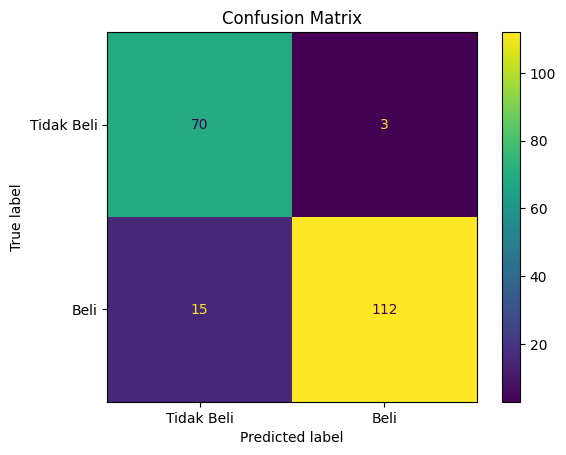

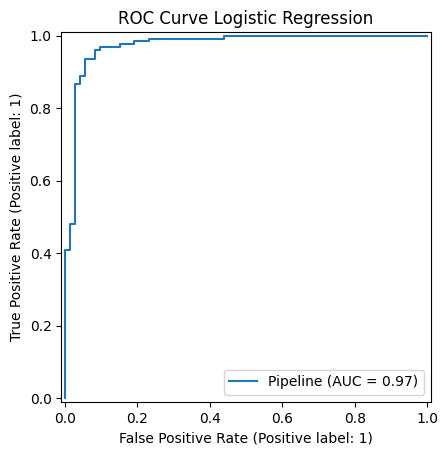

In [11]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                                      display_labels=['Tidak Beli', 'Beli']
                                      ).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Beli (0)', 'Beli (1)']))

                precision    recall  f1-score   support

Tidak Beli (0)       0.82      0.96      0.89        73
      Beli (1)       0.97      0.88      0.93       127

      accuracy                           0.91       200
     macro avg       0.90      0.92      0.91       200
  weighted avg       0.92      0.91      0.91       200



In [13]:
from sklearn.model_selection import cross_val_score

# Lakukan cross validation (CV=5 berarti 5-fold)
scores = cross_val_score(clf, x, y, cv=5)

# Tampilkan hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.79  0.925 0.96  0.94  0.94 ]
Rata-rata akurasi: 0.9109999999999999
Standar deviasi: 0.06151422599691877


In [14]:
# Ambil nama fitur & koefisien
# Get feature names after one-hot encoding
ohe_feature_names = clf.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(feature_cat)
Feat_names = feature_num + feature_bin + list(ohe_feature_names) # Corrected variable name
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': Feat_names, # Corrected variable name
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
})
coef_df.sort_values(by='Odds Ratio (e^coef)', ascending=False)
display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
0,Usia,-0.039522,0.961249
1,Penghasilan,4.627325,102.240183
2,Kelamin,-1.101125,0.332497
3,Status_0,0.257039,1.293095
4,Status_1,0.323219,1.381567
5,Status_2,-0.643454,0.525474
6,Status_3,0.246813,1.279940
7,Memiliki_Mobil_0,0.339773,1.404628
8,Memiliki_Mobil_1,0.574267,1.775828
9,Memiliki_Mobil_2,0.625303,1.868812


In [15]:
# Contoh 2 data
data_baru = pd.DataFrame({
    'Usia': [45, 28],
    'Penghasilan': [450, 120],
    'Kelamin': [0, 1],
    'Status': [1, 0],
    'Memiliki_Mobil': [2, 0]
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = prob
hasil['Pred (=0:Tidak, 1=Ya)'] = pred
display(hasil)

,Usia,Penghasilan,Kelamin,Status,Memiliki_Mobil,Prob_Beli_Mobil,"Pred (=0:Tidak, 1=Ya)"
0,45,450,0,1,2,0.999992,1
1,28,120,1,0,0,0.002860,0
